<a href="https://colab.research.google.com/github/Chamindu77/Data-Preprocessing/blob/main/Data_Visualization_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df = df.sort_values(by='Formatted Date')

/tmp/ipython-input-2426625452.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


### Line Plot

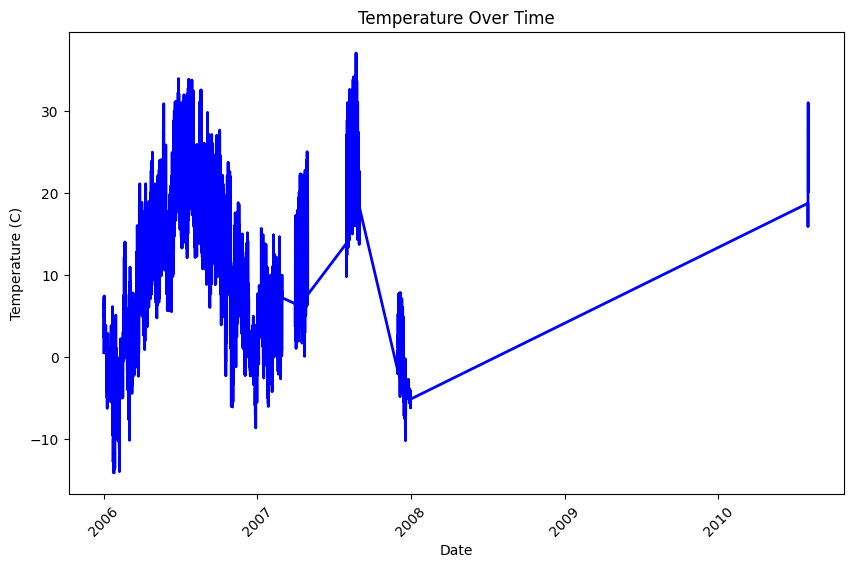

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Formatted Date', y='Temperature (C)', color='b', linewidth = 2, data=df)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.show()

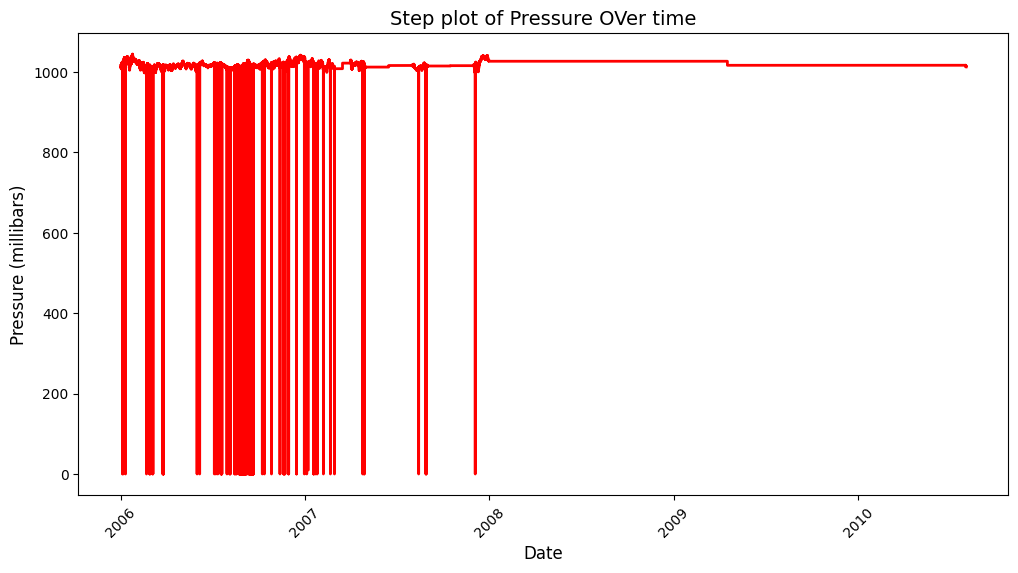

In [10]:
plt.figure(figsize = (12,6))

sns.lineplot(data = df, x = 'Formatted Date', y = 'Pressure (millibars)', drawstyle = 'steps-mid', color='r', linewidth = 2)

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Pressure (millibars)', fontsize = 12)
plt.title("Step plot of Pressure OVer time", fontsize = 14)

plt.xticks(rotation = 45)

plt.show()

### Area Chart

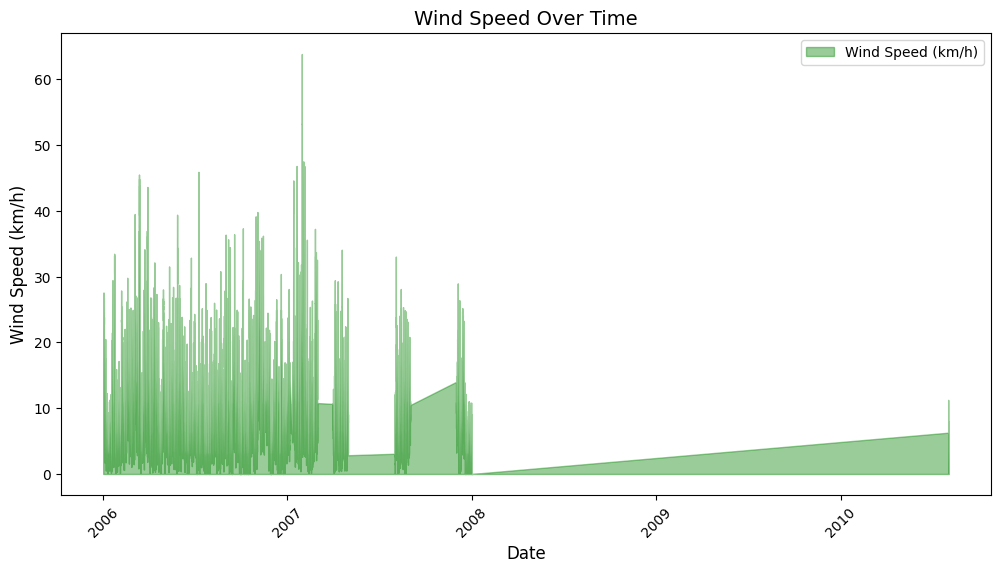

In [12]:
plt.figure(figsize=(12,6))

plt.fill_between(df['Formatted Date'], df['Wind Speed (km/h)'], color = 'green', alpha = 0.4, label = 'Wind Speed (km/h)')

plt.xlabel('Date', fontsize = 12)
plt.ylabel('Wind Speed (km/h)', fontsize = 12)
plt.title('Wind Speed Over Time', fontsize = 14)

plt.xticks(rotation = 45)
plt.legend()

plt.show()

### Density Plot (KDE)

/tmp/ipython-input-2608682290.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Temperature (C)'], shade = True , color = 'purple', fill = True, linewidth = 2)


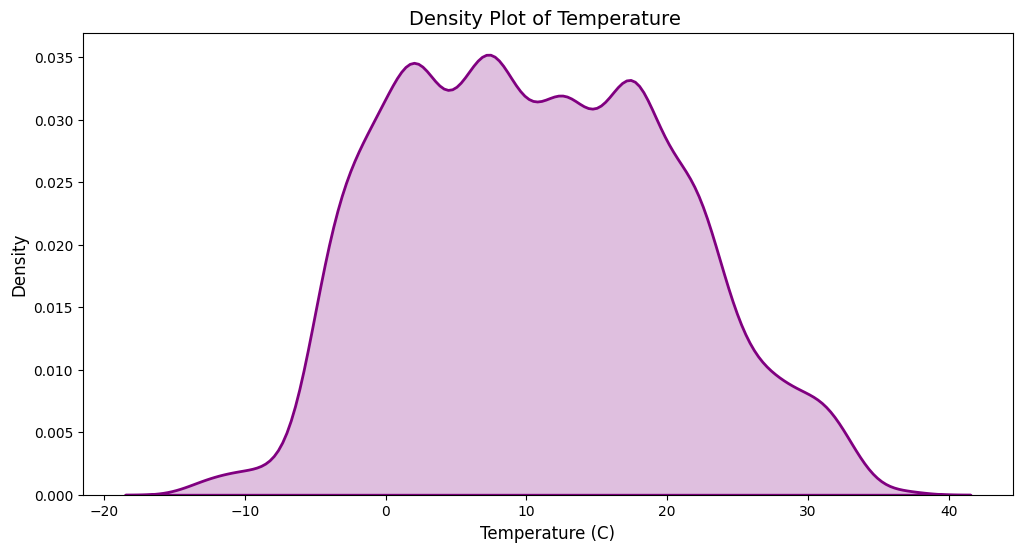

In [14]:
plt.figure(figsize=(12,6))

sns.kdeplot(df['Temperature (C)'], shade = True , color = 'purple', fill = True, linewidth = 2)

plt.xlabel('Temperature (C)', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.title('Density Plot of Temperature ', fontsize = 14)

plt.show()

### Bubble Chart

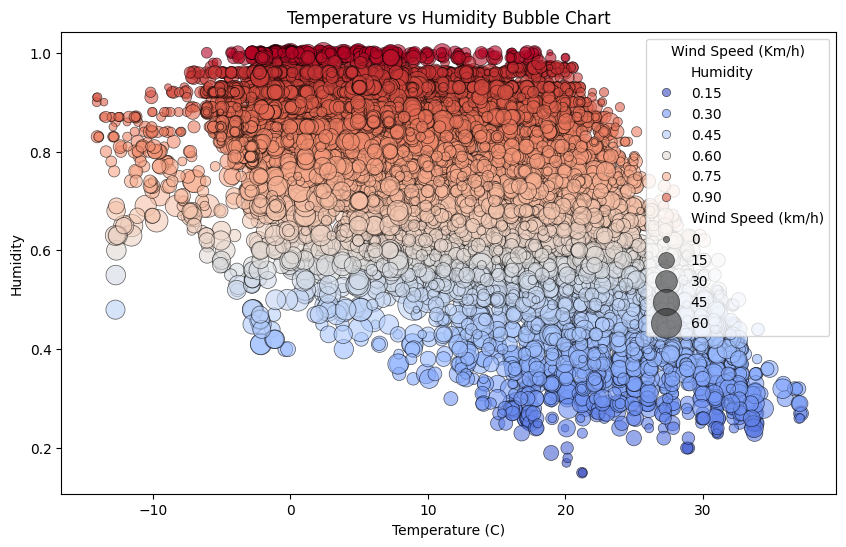

In [16]:
plt.figure(figsize=(10,6))

bubble = sns.scatterplot(data = df, x = 'Temperature (C)', y ='Humidity', size='Wind Speed (km/h)', hue = 'Humidity', palette='coolwarm', alpha = 0.6, edgecolor = 'black', sizes=(20,500))

plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity Bubble Chart')
plt.legend(title = 'Wind Speed (Km/h)', loc = 'upper right')

plt.show()

### 3D Scatter Plot

In [17]:
df_clean = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']].dropna()

In [18]:
x = df_clean['Temperature (C)']
y = df_clean['Humidity']
z = df_clean['Wind Speed (km/h)']

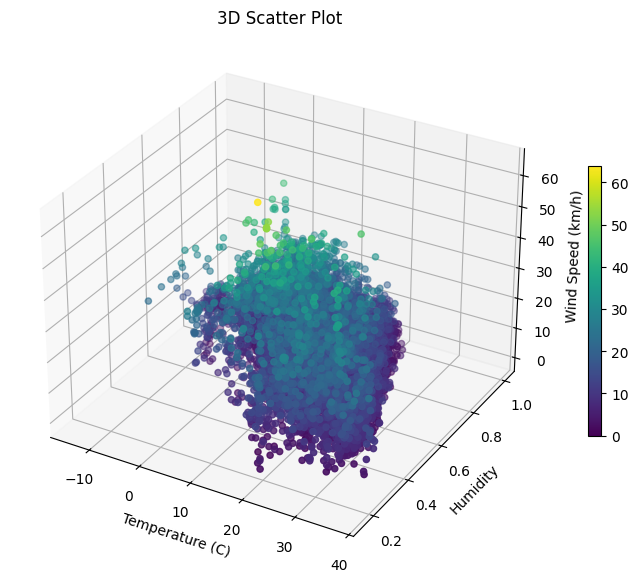

In [22]:
fig1 = plt.figure(figsize = (10,7))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(x, y, z, c = z, cmap = 'viridis' )

ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Humidity')
ax1.set_zlabel('Wind Speed (km/h)')
ax1.set_title('3D Scatter Plot')

plt.colorbar(scatter1, ax = ax1, shrink = 0.5)
plt.show()

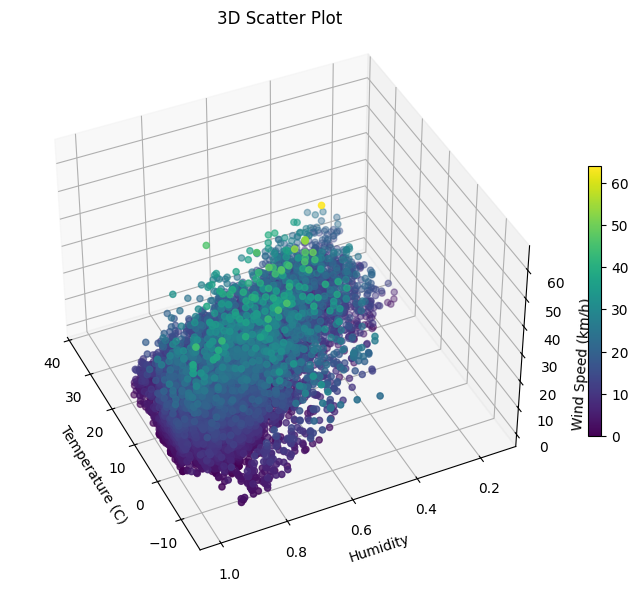

In [27]:
fig1 = plt.figure(figsize = (10,7))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(x, y, z, c = z, cmap = 'viridis' )

ax1.view_init(elev = 40, azim = 155)
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Humidity')
ax1.set_zlabel('Wind Speed (km/h)')
ax1.set_title('3D Scatter Plot')

plt.colorbar(scatter1, ax = ax1, shrink = 0.5)
plt.show()

### Tri Surface Plot

In [29]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x,y), z, (xi, yi), method='linear')

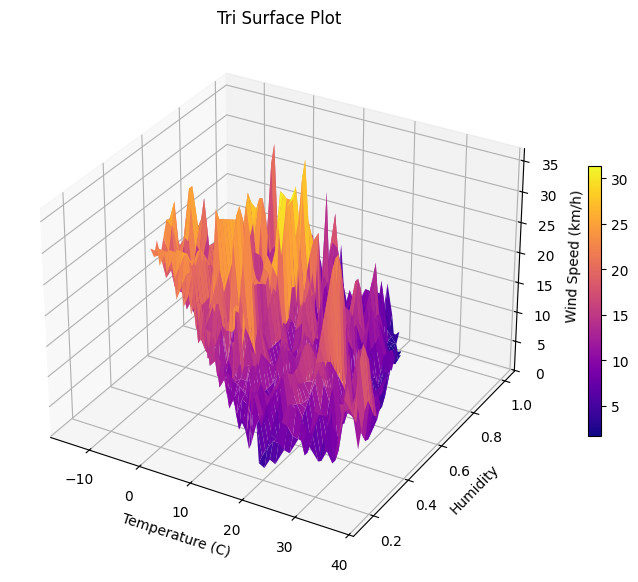

In [30]:

fig2 = plt.figure(figsize=(10,7))
ax2 = fig2.add_subplot(111, projection = '3d')
surface = ax2.plot_surface(xi, yi, zi, cmap = 'plasma', edgecolor = 'none')

ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Humidity')
ax2.set_zlabel('Wind Speed (km/h)')
ax2.set_title('Tri Surface Plot')

plt.colorbar(surface, ax = ax2, shrink=0.5)
plt.show()